# Shopping Apps, Rating for Google Play Store and Apple AppStore Users

<img src="https://image.freepik.com/free-vector/cartoon-delivery-man-brings-goods-customer-from-laptop-vector-illustration-concept-with-online-shopping-services_46527-344.jpg" />

## Introduction

Users download apps for various purposes. Given that there is a rise in the usage of online shopping due to the Covid-19 pandemic, improvement of shopping experience has become more important then before. With that in mind, what are the important features we have to look out for to improve a shopping app?

## Problem Statement

- How do the app ratings differ across different shopping apps?
- Is there any specific group of users we can look out for to improve the app?
- Are there any specific improvement we can work on to further improve user satisfaction of the app?

To explore and answer the above questions, we will scrap reviews from Google Play Store and Apple AppStore and conduct analysis and modelling.

## Executive Summary

The data is webscrapped from the Shopping category in Google Play Store and Apple Appstore, 8 apps reviews were chosen for this project (Amazon, Wish, ASOS, Lazada, Ebay, Shoppee, AliExpress, Carousell). The data used was exclusive dated in 2020 only as majority of the data scrapped are from in 2020. Data cleaning was done by removing stopwords, lemmatized and Vectorized to the raw data to create bag-of-words. 

There will be 2 steps to our modelling process, with the first step classifying whether the text is a good or bad review, followed by classifying the reviews into categories created through topic modelling to group them into different subgroups.

A few classification model were used, namely LogisticRegression, MultinomialNB, SGDClassifier, RandomForest, ADABoost. LogisticRegression give us the best results in classifying our data and thus used as the final model. 

As the data set is quite big, RandomizedSearch was used instead of Gridsearch to find the best hyperparameter.



### Content Summary
- Webscrapped reviews of 8 apps from Google Play Store & Apple App Store
- Data Cleaning 
  - Removing data not in year 2020
  - Removing emoji and punctuations
  - Removing non english words
  - Lemmatization
  - Compound score calculation using VaderSentiment
- EDA
- - Check for wrongly Rated reviews
  - Plotting distribution of features
  - Topic modelling of good reviews
  - Topic modelling of bad reviews
- Machine Learning Model 
  - LogisticRegression
  - MultinomialNB
  - SGDClassifier
  - RandomForest
  - ADABoost
- Deep Learning Model
  - Convolutional Neural Network
  
### Key Findings
- Bad reviews tend to have more word count as compared to Good reviews
- More negative reviews are seen in 9am - 3pm period
- More negative reviews on Tuesdays
- Good Reviews are mostly on Convenient App and User Interface
- Bad reviews are mostly on User Interface, App Issues and Purchase Experience
- There is more negative reviews in 9am - 3pm period, and on Tuesdays
- There is quite a number of reviews being 1 word, or otherwise rated wrongly by the user, (e.g. review: Excellent, Rating: 1)
- Delivery seems to have a dip in rating from March.
- Refund and Product issue is consistently low for Negative Reviews
- Base on compound scores, Delivery and Product tend to be very low as compared to other categories.

### Metrics
Using the following metrics to evaluate the models:
- ROC AUC curve(for Binary Classification)
  -  The ROC AUC curve is able to tell how much the model is capable of distinguishing between 0 and 1, with 1 being perfectly classified.
- MCC Score
  - The Matthews correlation coefficient (MCC), instead, is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.
- Kappa Score(For multiclassification)
  - Cohen’s Kappa is a quantitative measure of reliability for two raters that are rating the same thing, corrected for how often that the raters may agree by chance. ranging from 0 to 1, with 1 being good.
  
- f1 score weighted
  - The F1 Scores are calculated for each label and then their average is weighted by support - which is the number of true instances for each label. It can result in an F-score that is not between precision and recall

### Final Results
**Classification (Good & Bad Reviews)**
- LogisticRegression
  - Train data AUC: 0.966
  - Test data AUC: 0.965
  - MCC Score: 0.773
- Convolutional Neural Network
  - Train data AUC: 0.977
  - Test data AUC: 0.961
  - MCC Score: 0.767
  
**Multi Classification (Bad Review categories)**
- LogisticRegression
    - Train Data f1 weighted score: 0.731
    - Test Data f1 weighted score: 0.741	
    - MCC Score: 0.705	
    - Kappa Score: 0.704
- Convolutional Neural Network
  - Train data Acciracy: 0.914
  - Test data Accuracy: 0.717
  - MCC Score: 0.679
  - Kappa Score: 0.679 

**Multi Classification (Good Review categories)**
- LogisticRegression
    - Train Data f1 weighted score: 0.868	
    - Test Data f1 weighted score: 0.878	
    - MCC Score: 0.851	
    - Kappa Score: 0.850
- Convolutional Neural Network
  - Train data Acciracy: 0.941
  - Test data Accuracy: 0.841
  - MCC Score: 0.805
  - Kappa Score: 0.657 

**Model Remarks**
- From the misclassified post we can see the some comments are rated wrongly if we were to just look at the reviews directly.
- Some of the reviews are predicted wrongly. After looking at some of the reviews, it is clear that there are some misclassification by the topic modelling.
- It can be seen that the model is actually predicting better then what was classified in the first place.
- Some of the topics are very closely related to one another, which make it harder for the model to predict correctly

### Limitations
- The data set is mostly collected in the month of August and September, which means the model is able to predict this period better, but not in predicting past data. 
- More data could be collected, as there is a major lack of Apple Appstore reviews compared to Google Play Store

### Further research
- Try to use Compound score gathered from VaderSentiment to do the classification instead, as we know there is some misclassified post by users. which hopefully give us a better accuracy.

### Content
1. Webscrap data
2. Data Cleaning
3. EDA
4. Model Part 1, Classification (Good & Bad Reviews)
5. Model Part 2, Multi Classification (Bad Review categories) 
6. Model Part 3, Multi Classification (Good Review categories)
7. Deep Learning Model

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from PIL import Image
from wordcloud import WordCloud


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

from sklearn.metrics import matthews_corrcoef, confusion_matrix, plot_confusion_matrix, cohen_kappa_score
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

import pickle

In [2]:
df = pd.read_csv('../data/reviews_Model.csv')

In [3]:
df.head()

,rating,date,app,store,review,clean_content,adj,noun,verb,emoji,...,pos_score,compound_score,language,month,dayofweek,hour,minute,text_len,word_count,category
0,5,2020-09-16 20:26:28,shoppee,google,Orders mostly came early and products are good.,order come early product good,good,order product,come,NaN,...,0.293,0.4404,en,9,3,20,26,47,8,Delivery
1,4,2020-09-16 20:13:46,shoppee,google,Good and convenient,good convenient,good convenient,NaN,NaN,NaN,...,0.592,0.4404,en,9,3,20,13,19,3,Convenient App
2,4,2020-09-16 20:11:18,shoppee,google,My first purchase experience...Happy with purc...,purchase experience happy purchase thks,first happy,purchase experience purchase,NaN,NaN,...,0.286,0.3400,en,9,3,20,11,57,7,Consumer Satisfaction
3,5,2020-09-16 20:08:54,shoppee,google,A lot of items at a very good deal.,lot item good deal,good,lot item deal,NaN,NaN,...,0.285,0.4927,en,9,3,20,8,35,9,Variety & Price
4,5,2020-09-16 19:37:21,shoppee,google,Delivery is fast,delivery fast,fast,delivery,NaN,NaN,...,0.000,0.0000,en,9,3,19,37,16,3,Delivery


## Taking out all bad reviews for training

In [4]:
df[df['rating'] > 3 ]['category'].value_counts(normalize = True)

Convenient App           0.307810
User Interface           0.229310
Shopping Experience      0.100025
Delivery                 0.094128
User Experience          0.059800
Variety & Price          0.046032
In-App Actitives         0.044866
Customer Service         0.040315
Recommendations          0.039754
Consumer Satisfaction    0.037960
Name: category, dtype: float64

In [5]:
df = df[df['rating'] > 3 ][['category', 'clean_content', 'review']]
df.head()

,category,clean_content,review
0,Delivery,order come early product good,Orders mostly came early and products are good.
1,Convenient App,good convenient,Good and convenient
2,Consumer Satisfaction,purchase experience happy purchase thks,My first purchase experience...Happy with purc...
3,Variety & Price,lot item good deal,A lot of items at a very good deal.
4,Delivery,delivery fast,Delivery is fast


In [6]:
#Checking null values
df.isna().sum()

category         0
clean_content    0
review           0
dtype: int64

## Train Test Split Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_content'], 
                                                    df['category'], 
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify = df['category'])

In [8]:
print(f'X_train rows: {X_train.shape[0]}, X_test rows: {X_test.shape[0]}')
print(f'y_train rows: {y_train.shape[0]}, y_test rows: {y_test.shape[0]}')

X_train rows: 35679, X_test rows: 8920
y_train rows: 35679, y_test rows: 8920


## Baseline Model

In [9]:
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 5000)

train_data_features = vectorizer.fit_transform(X_train)
test_data_features = vectorizer.transform(X_test)

print(train_data_features.shape)
print(test_data_features.shape)

(35679, 5000)
(8920, 5000)


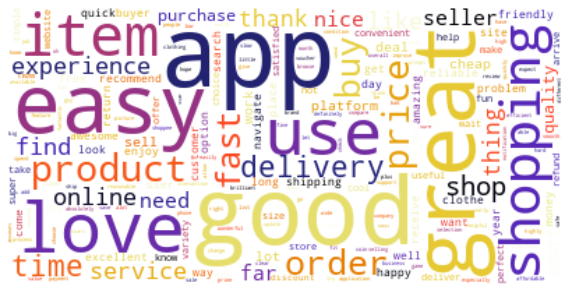

In [10]:
common_words = pd.DataFrame(train_data_features.toarray(), columns = vectorizer.get_feature_names()).sum().sort_values(ascending = False)

wordcloud = WordCloud(max_font_size=70,
                      max_words=200,
                      background_color="white",
                      colormap='CMRmap')
wordcloud.generate_from_frequencies(frequencies=common_words)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
# Instantiate logistic regression model.
lr = LogisticRegression(solver = 'lbfgs', max_iter = 5000)

# Fit model to training data.
lr.fit(train_data_features, y_train)

# Evaluate model on training data.
print(f'Accuracy score for Train data set: {lr.score(train_data_features, y_train)}')

# Evaluate model on testing data.
print(f'Accuracy score for Test data set: {lr.score(test_data_features, y_test)}')

Accuracy score for Train data set: 0.9372459990470585
Accuracy score for Test data set: 0.864237668161435


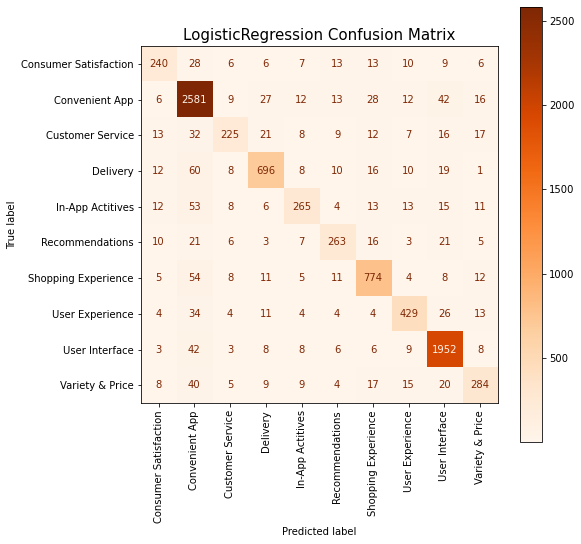

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('LogisticRegression Confusion Matrix', fontdict = {'fontsize': 15})
plot_confusion_matrix(lr, test_data_features, y_test, ax = ax, cmap='Oranges', xticks_rotation=90);

In [13]:
print(classification_report(y_test, lr.predict(test_data_features), digits=3))

                       precision    recall  f1-score   support

Consumer Satisfaction      0.767     0.710     0.737       338
       Convenient App      0.876     0.940     0.907      2746
     Customer Service      0.798     0.625     0.701       360
             Delivery      0.872     0.829     0.850       840
     In-App Actitives      0.796     0.662     0.723       400
      Recommendations      0.780     0.741     0.760       355
  Shopping Experience      0.861     0.868     0.864       892
      User Experience      0.838     0.805     0.821       533
       User Interface      0.917     0.955     0.936      2045
      Variety & Price      0.761     0.691     0.724       411

             accuracy                          0.864      8920
            macro avg      0.827     0.783     0.802      8920
         weighted avg      0.861     0.864     0.862      8920



## Testing with different vectorizers

### CountVectorizer Logistic Regression

In [14]:
# Setting pipeline for two stages
cvec_lr = Pipeline([
    ('cvec', CountVectorizer()),
    ('sampling', SMOTE(random_state=42, n_jobs = -1)),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter = 5000))
     ])

pipe_params = {
    'cvec__max_features': [6000, 7000, 8000, 9000, 10000, 11000, 12000],
    'cvec__min_df': [3, 4],
    'cvec__max_df': [.2 , .3,],
    'cvec__ngram_range': [(1,1), (1,2), (1,3)],
    'sampling__sampling_strategy': ['minority', 'not minority'],
    'sampling__k_neighbors': [5, 10]
}

gs_cvec_lr = RandomizedSearchCV(cvec_lr, # what object are we optimizing?
                                param_distributions=pipe_params, # what parameters values are we searching?
                                random_state = 42, n_iter = 20,
                                cv=5, verbose = 1, n_jobs = -1, scoring = 'f1_weighted') # 5-fold cross-validation.
t0 = time()
gs_cvec_lr.fit(X_train, y_train)
cvec_test_time = time() - t0
print(f'Best CVEC Parameters: {gs_cvec_lr.best_estimator_}')
print('Fit time:  %0.3fs' % cvec_test_time);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  9.5min finished


Best CVEC Parameters: Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.3, max_features=11000, min_df=4)),
                ('sampling',
                 SMOTE(k_neighbors=10, n_jobs=-1, random_state=42,
                       sampling_strategy='minority')),
                ('lr', LogisticRegression(max_iter=5000))])
Fit time:  581.963s


### TFIDVectorizer Logistic Regression

In [15]:
# Setting pipeline for two stages
tfid_lr = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('sampling', SMOTE(random_state=42, n_jobs = -1)),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter = 5000))
])

pipe_params = {
    'tfid__max_features': [6000, 7000, 8000, 9000, 10000, 11000, 12000],
    'tfid__min_df': [3, 4],
    'tfid__max_df': [.2, .3],
    'tfid__ngram_range': [(1,1), (1,2), (1,3)],
    'sampling__sampling_strategy': ['minority', 'not minority'],
    'sampling__k_neighbors': [5, 10]
}

gs_tfid_lr = RandomizedSearchCV(tfid_lr, # what object are we optimizing?
                                param_distributions=pipe_params, # what parameters values are we searching?
                                random_state = 42, n_iter = 20,
                                cv=5, verbose = 1, n_jobs = -1, scoring = 'f1_weighted') # 5-fold cross-validation.
t0 = time()
gs_tfid_lr.fit(X_train, y_train)
tfid_test_time = time() - t0
print(f'Best TFID Parameters: {gs_tfid_lr.best_estimator_}')
print('Fit time:  %0.3fs' % tfid_test_time);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  9.3min finished


Best TFID Parameters: Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.3, max_features=11000, min_df=3)),
                ('sampling',
                 SMOTE(n_jobs=-1, random_state=42,
                       sampling_strategy='minority')),
                ('lr', LogisticRegression(max_iter=5000))])
Fit time:  569.397s


### HashingVectorizer Logistic Regression

In [16]:
# Setting pipeline for two stages
hash_lr = Pipeline([
    ('hash', HashingVectorizer()),
    ('sampling', SMOTE(random_state=42, n_jobs = -1)),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter = 5000))
])

pipe_params = {
    'hash__n_features': [4000, 5000, 6000, 7000, 8000, 9000],
    'hash__ngram_range': [(1,1), (1,2)],
    'sampling__sampling_strategy': ['minority', 'not minority'],
    'sampling__k_neighbors': [5, 10]
}

gs_hash_lr = RandomizedSearchCV(hash_lr, # what object are we optimizing?
                                param_distributions=pipe_params, # what parameters values are we searching?
                                random_state = 42, n_iter = 20,
                                cv=5, verbose = 1, n_jobs = -1, scoring = 'f1_weighted') # 5-fold cross-validation.

t0 = time()
gs_hash_lr.fit(X_train, y_train)
hash_test_time = time() - t0
print(f'Best HASH Parameters: {gs_hash_lr.best_estimator_}')
print('Fit time:  %0.3fs' % hash_test_time);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.5min finished


Best HASH Parameters: Pipeline(steps=[('hash', HashingVectorizer(n_features=9000)),
                ('sampling',
                 SMOTE(k_neighbors=10, n_jobs=-1, random_state=42,
                       sampling_strategy='not minority')),
                ('lr', LogisticRegression(max_iter=5000))])
Fit time:  663.068s


In [17]:
summary = []

summary.append(['LogisticRegression', 'CountVectorizer',
                gs_cvec_lr.best_score_,
                gs_cvec_lr.score(X_test,y_test),
                matthews_corrcoef(y_test, gs_cvec_lr.predict(X_test)),
                round(cvec_test_time)])


summary.append(['LogisticRegression', 'TFIDVectorizer', 
                gs_tfid_lr.best_score_,
                gs_tfid_lr.score(X_test,y_test),
                matthews_corrcoef(y_test, gs_tfid_lr.predict(X_test)),
                round(tfid_test_time)])

summary.append(['LogisticRegression', 'HashingVectorizer', 
                gs_hash_lr.best_score_,
                gs_hash_lr.score(X_test,y_test), 
                matthews_corrcoef(y_test, gs_hash_lr.predict(X_test)),
                round(hash_test_time)])


pd.DataFrame(summary, 
             columns = ['model', 
                        'vectorizer', 
                        'train_score', 
                        'test_score',
                        'MCC_score',
                        'time(s)']).style.highlight_max().highlight_min(color = 'red')

,model,vectorizer,train_score,test_score,MCC_score,time(s)
0,LogisticRegression,CountVectorizer,0.839460,0.845395,0.809145,582
1,LogisticRegression,TFIDVectorizer,0.852081,0.859806,0.829787,569
2,LogisticRegression,HashingVectorizer,0.831195,0.835479,0.800412,663


In [18]:
print(classification_report(y_test, gs_tfid_lr.predict(X_test), digits=3))

                       precision    recall  f1-score   support

Consumer Satisfaction      0.510     0.896     0.650       338
       Convenient App      0.892     0.936     0.913      2746
     Customer Service      0.825     0.603     0.697       360
             Delivery      0.870     0.852     0.861       840
     In-App Actitives      0.818     0.627     0.710       400
      Recommendations      0.835     0.670     0.744       355
  Shopping Experience      0.880     0.849     0.864       892
      User Experience      0.859     0.765     0.810       533
       User Interface      0.927     0.952     0.939      2045
      Variety & Price      0.805     0.655     0.722       411

             accuracy                          0.860      8920
            macro avg      0.822     0.781     0.791      8920
         weighted avg      0.868     0.860     0.860      8920



## Trying with Different Models

### Logistic Regression

In [19]:
# Setting pipeline for two stages
tfid_lr = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('sampling', SMOTE(random_state=42, n_jobs = -1, sampling_strategy = 'not minority')),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter = 5000))
])

pipe_params = {
    'tfid__max_features': [6000, 7000, 8000, 9000, 10000, 11000, 12000],
    'tfid__min_df': [3, 4],
    'tfid__max_df': [.2, .3],
    'tfid__ngram_range': [(1,1), (1,2), (1,3)],
    'sampling__k_neighbors': [10, 15],
    'lr__C': list(np.linspace(10, 21, 5))
}

gs_tfid_lr = RandomizedSearchCV(tfid_lr, # what object are we optimizing?
                                param_distributions=pipe_params, # what parameters values are we searching?
                                random_state = 42, n_iter = 30,
                                cv=5, verbose = 1, n_jobs = -1, scoring = 'f1_weighted') # 5-fold cross-validation.
t0 = time()
gs_tfid_lr.fit(X_train, y_train)
tfid_lr_test_time = time() - t0
print(f'Best Logistic Regression Parameters: {gs_tfid_lr.best_estimator_}')
print('Fit time:  %0.3fs' % tfid_lr_test_time);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 38.5min finished


Best Logistic Regression Parameters: Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.3, max_features=8000, min_df=3)),
                ('sampling',
                 SMOTE(k_neighbors=10, n_jobs=-1, random_state=42,
                       sampling_strategy='not minority')),
                ('lr', LogisticRegression(C=18.25, max_iter=5000))])
Fit time:  2367.364s


### MultinomialNB

In [20]:
# Setting pipeline for two stages
tfid_nb = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('sampling', SMOTE(random_state=42, n_jobs = -1, sampling_strategy = 'not minority')),
    ('nb', MultinomialNB())
])

pipe_params = {
    'tfid__max_features': [6000, 7000, 8000, 9000, 10000, 11000, 12000],
    'tfid__min_df': [3, 4],
    'tfid__max_df': [.2, .3],
    'tfid__ngram_range': [(1,1), (1,2), (1,3)],
    'nb__alpha': list(np.linspace(0,1,11))
}

gs_tfid_nb = RandomizedSearchCV(tfid_nb, # what object are we optimizing?
                                param_distributions=pipe_params, # what parameters values are we searching?
                                random_state = 42, n_iter = 30,
                                cv=5, verbose = 1, n_jobs = -1, scoring = 'f1_weighted') # 5-fold cross-validation.
t0 = time()
gs_tfid_nb.fit(X_train, y_train)
tfid_nb_test_time = time() - t0
print(f'Best MultinomialNB Parameters: {gs_tfid_nb.best_estimator_}')
print('Fit time:  %0.3fs' % tfid_nb_test_time);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.4min finished


Best MultinomialNB Parameters: Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.3, max_features=6000, min_df=4,
                                 ngram_range=(1, 3))),
                ('sampling',
                 SMOTE(n_jobs=-1, random_state=42,
                       sampling_strategy='not minority')),
                ('nb', MultinomialNB(alpha=0.2))])
Fit time:  150.575s


### SGDClassifier

In [21]:
# Setting pipeline for two stages
tfid_clf = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('sampling', SMOTE(random_state=42, n_jobs = -1, sampling_strategy = 'not minority')),
    ('clf', SGDClassifier())
])

pipe_params = {
    'tfid__max_features': [6000, 7000, 8000, 9000, 10000, 11000, 12000],
    'tfid__min_df': [3, 4],
    'tfid__max_df': [.2, .3],
    'tfid__ngram_range': [(1,1), (1,2), (1,3)],
    'sampling__k_neighbors': [10, 15],
    'clf__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    'clf__penalty': ('l2', 'elasticnet'),
    
    
}

gs_tfid_clf = RandomizedSearchCV(tfid_clf, # what object are we optimizing?
                                 param_distributions=pipe_params, # what parameters values are we searching?
                                 random_state = 42, n_iter = 30,
                                 cv=5, verbose = 1, n_jobs = -1, scoring = 'f1_weighted') # 5-fold cross-validation.
t0 = time()
gs_tfid_clf.fit(X_train, y_train)
tfid_clf_test_time = time() - t0
print(f'Best SGDClassifier Parameters: {gs_tfid_clf.best_estimator_}')
print('Fit time:  %0.3fs' % tfid_clf_test_time);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.0min finished


Best SGDClassifier Parameters: Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.2, max_features=7000, min_df=4)),
                ('sampling',
                 SMOTE(k_neighbors=15, n_jobs=-1, random_state=42,
                       sampling_strategy='not minority')),
                ('clf', SGDClassifier())])
Fit time:  247.131s


### RandomForest

In [22]:
# Setting pipeline for two stages
tfid_ran = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('sampling', SMOTE(random_state=42, n_jobs = -1, sampling_strategy = 'not minority')),
    ('rf', RandomForestClassifier(random_state = 42, min_samples_leaf = 2, min_samples_split = 3))
])

pipe_params = {
    'tfid__max_features': [6000, 7000, 8000, 9000, 10000, 11000, 12000],
    'tfid__min_df': [3, 4],
    'tfid__max_df': [.2, .3],
    'tfid__ngram_range': [(1,1), (1,2), (1,3)],
    'sampling__k_neighbors': [10, 15],
    'rf__n_estimators': [100, 300, 500],
    'rf__max_depth': [8, 15, 25],
    'rf__min_samples_split': [5, 15, 100],
    'rf__max_leaf_nodes': [10, None]
}

gs_tfid_ran = RandomizedSearchCV(tfid_ran, # what object are we optimizing?
                                 param_distributions=pipe_params, # what parameters values are we searching?
                                 random_state = 42, n_iter = 30,
                                 cv=5, verbose = 1, n_jobs = -1, scoring = 'f1_weighted') # 5-fold cross-validation.
t0 = time()
gs_tfid_ran.fit(X_train, y_train)
tfid_ran_test_time = time() - t0
print(f'Best RandomForest Parameters: {gs_tfid_ran.best_estimator_}')
print('Fit time:  %0.3fs' % tfid_ran_test_time);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  8.7min finished


Best RandomForest Parameters: Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.3, max_features=10000, min_df=3,
                                 ngram_range=(1, 2))),
                ('sampling',
                 SMOTE(k_neighbors=15, n_jobs=-1, random_state=42,
                       sampling_strategy='not minority')),
                ('rf',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=2,
                                        min_samples_split=15,
                                        random_state=42))])
Fit time:  531.526s


### Adaboost

In [23]:
# Setting pipeline for two stages
tfid_ada = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('sampling', SMOTE(random_state=42, n_jobs = -1, sampling_strategy = 'not minority')),
    ('ada', AdaBoostClassifier())
])

pipe_params = {
    'tfid__max_features': [6000, 7000, 8000, 9000, 10000, 11000, 12000],
    'tfid__min_df': [3, 4],
    'tfid__max_df': [.2, .3],
    'tfid__ngram_range': [(1,1), (1,2), (1,3)],
    'sampling__k_neighbors': [10, 15],
    'ada__n_estimators': [100,150,200],
    'ada__learning_rate': list(np.linspace(0.3,1,5))
}

gs_tfid_ada = RandomizedSearchCV(tfid_ada, # what object are we optimizing?
                                 param_distributions=pipe_params, # what parameters values are we searching?
                                 random_state = 42, n_iter = 20,
                                 cv=5, verbose = 1, n_jobs = -1, scoring = 'f1_weighted') # 5-fold cross-validation.
t0 = time()
gs_tfid_ada.fit(X_train, y_train)
tfid_ada_test_time = time() - t0
print(f'Best TFID Parameters: {gs_tfid_ada.best_estimator_}')
print('Fit time:  %0.3fs' % tfid_ada_test_time);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 21.2min finished


Best TFID Parameters: Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.3, max_features=12000, min_df=4)),
                ('sampling',
                 SMOTE(k_neighbors=10, n_jobs=-1, random_state=42,
                       sampling_strategy='not minority')),
                ('ada', AdaBoostClassifier(n_estimators=200))])
Fit time:  1336.895s


### Accuracy & F1 Macro Score

In [24]:
summary = []

summary.append(['LogisticRegression', 'TFIDVectorizer', 
                gs_tfid_lr.best_score_,
                gs_tfid_lr.score(X_test,y_test),
                matthews_corrcoef(y_test, gs_tfid_lr.predict(X_test)),
                cohen_kappa_score(y_test, gs_tfid_lr.predict(X_test)),
                round(tfid_lr_test_time)])


summary.append(['MultinomialNB', 'TFIDVectorizer', 
                gs_tfid_nb.best_score_,
                gs_tfid_nb.score(X_test,y_test),
                matthews_corrcoef(y_test, gs_tfid_nb.predict(X_test)),
                cohen_kappa_score(y_test, gs_tfid_nb.predict(X_test)),
                round(tfid_nb_test_time)])

summary.append(['SGDClassifier', 'TFIDVectorizer', 
                gs_tfid_clf.best_score_,
                gs_tfid_clf.score(X_test,y_test),
                matthews_corrcoef(y_test, gs_tfid_clf.predict(X_test)),
                cohen_kappa_score(y_test, gs_tfid_clf.predict(X_test)),
                round(tfid_clf_test_time)])

summary.append(['RandomForest', 'TFIDVectorizer', 
                gs_tfid_ran.best_score_,
                gs_tfid_ran.score(X_test,y_test),
                matthews_corrcoef(y_test, gs_tfid_ran.predict(X_test)),
                cohen_kappa_score(y_test, gs_tfid_ran.predict(X_test)),
                round(tfid_ran_test_time)])



summary.append(['Adaboost', 'TFIDVectorizer', 
                gs_tfid_ada.best_score_,
                gs_tfid_ada.score(X_test,y_test),
                matthews_corrcoef(y_test, gs_tfid_ada.predict(X_test)),
                cohen_kappa_score(y_test, gs_tfid_ada.predict(X_test)),
                round(tfid_ada_test_time)])


pd.DataFrame(summary, 
             columns = ['model', 
                        'vectorizer', 
                        'train_score', 
                        'test_score',
                        'MCC_score',
                        'Kappa_score',
                        'time(s)']).style.highlight_max().highlight_min(color = 'red')

,model,vectorizer,train_score,test_score,MCC_score,Kappa_score,time(s)
0,LogisticRegression,TFIDVectorizer,0.868648,0.878248,0.851137,0.850887,2367
1,MultinomialNB,TFIDVectorizer,0.751635,0.751926,0.701792,0.698521,151
2,SGDClassifier,TFIDVectorizer,0.702873,0.705139,0.663327,0.656504,247
3,RandomForest,TFIDVectorizer,0.657831,0.653370,0.590640,0.584611,532
4,Adaboost,TFIDVectorizer,0.700659,0.701068,0.633811,0.631844,1337


## Confusion Matrix

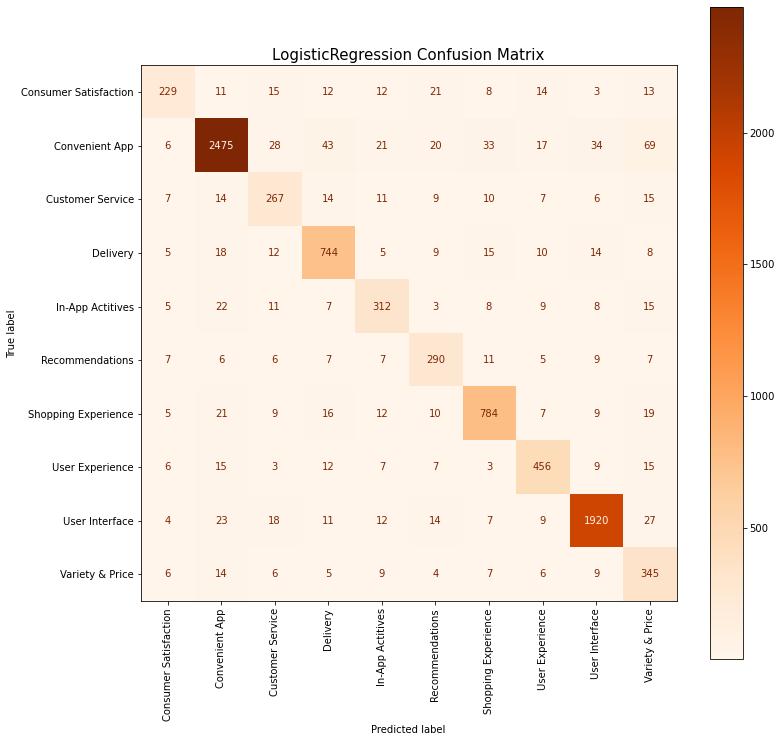

In [25]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.title('LogisticRegression Confusion Matrix', fontdict = {'fontsize': 15})
plot_confusion_matrix(gs_tfid_lr, X_test, y_test, ax = ax, cmap='Oranges', xticks_rotation=90);

In [26]:
best_model_coef = pd.DataFrame(data = gs_tfid_lr.best_estimator_.named_steps['lr'].coef_, 
                               index = gs_tfid_lr.best_estimator_.named_steps['lr'].classes_,
                               columns = gs_tfid_lr.best_estimator_.named_steps['tfid'].get_feature_names()).T

best_model_coef

,Consumer Satisfaction,Convenient App,Customer Service,Delivery,In-App Actitives,Recommendations,Shopping Experience,User Experience,User Interface,Variety & Price
100,-0.374251,1.347429,0.268328,2.107022,-2.546563,-0.012349,-0.055319,-0.435345,-0.003045,-0.295907
19,-1.530960,-2.875301,0.283933,2.271069,5.002229,0.582032,-1.627246,-0.386315,-0.097083,-1.622359
1st,-1.314866,-0.008406,-2.991444,2.081700,5.119544,-1.821262,-0.851285,3.830819,-2.686473,-1.358327
24hrs,-0.019016,-0.597831,-0.019053,-2.150379,3.124374,-0.016196,-0.294772,-0.008863,-0.001945,-0.016318
28th,-0.379548,-0.154847,-0.671329,-0.730868,-0.285229,-0.405115,-0.044370,3.353140,-0.003377,-0.678458
...,...,...,...,...,...,...,...,...,...,...
young,4.555896,0.512912,-2.519838,-1.287815,1.458931,-0.714759,-0.654780,1.526507,-0.680153,-2.196901
youtube,-1.449778,-1.103212,-1.176932,-0.315589,-1.211610,-0.494624,2.512506,3.454382,-0.243051,0.027908
yr,5.543439,-1.441047,-0.554589,-3.099606,2.956153,-0.107644,-1.865834,1.016950,-0.134704,-2.313119
zero,-0.002454,0.595931,-0.033964,-0.063049,-0.652126,-0.342158,-0.002356,-0.004217,0.540333,-0.035939


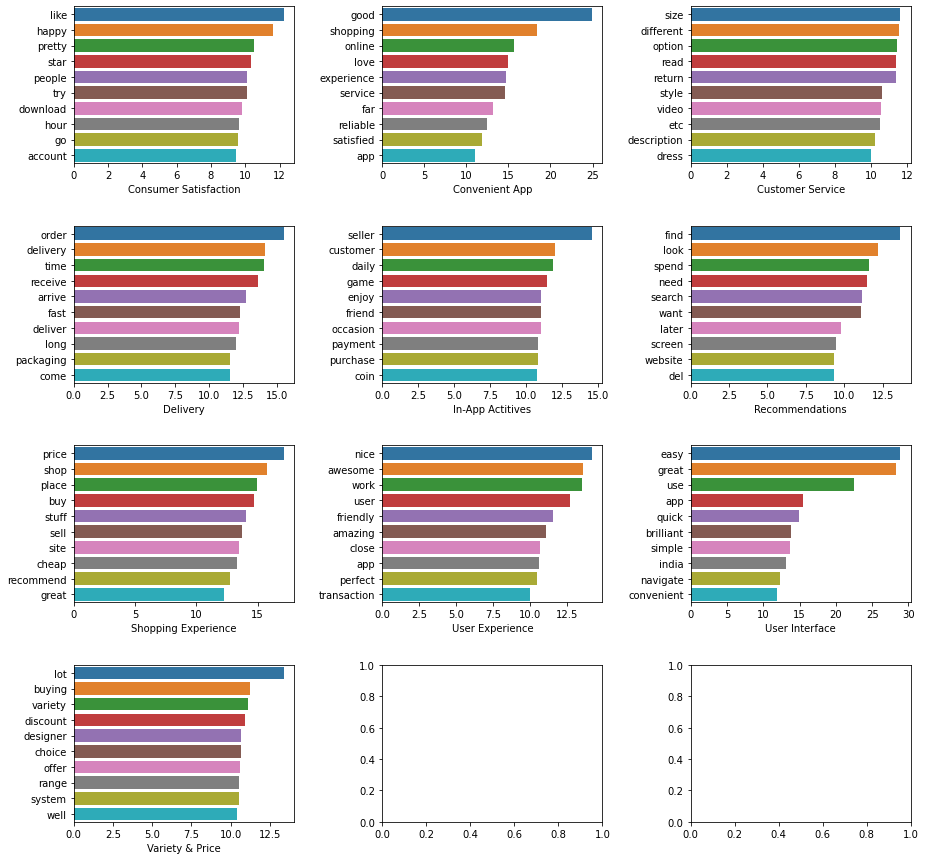

In [27]:
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (15,15))
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
ax = ax.ravel()
for i in range(len(best_model_coef.columns)):
    sns.barplot(x = best_model_coef[best_model_coef.columns[i]].sort_values(ascending = False)[:10], 
                y = best_model_coef[best_model_coef.columns[i]].sort_values(ascending = False)[:10].index,
                ax = ax[i]);

## Checking Misclassified Post

In [28]:
# Create DataFrame with column for predicted values.
results = pd.DataFrame(gs_tfid_lr.predict(X_test), columns=['predicted'], index = y_test.index)

# Create column for observed values.
results['actual'] = y_test
results['review'] = df['review']
results['clean_content'] = df['clean_content']

# Find all indices where predicted and true results 
# aren't the same, then save in an array.
ms_class = results[results['predicted']!= results['actual']]
ms_class.head(10)

,predicted,actual,review,clean_content
20226,Convenient App,Consumer Satisfaction,I really like that using this app is a holisti...,like app holistic experience right confirm rec...
38359,User Interface,Customer Service,"Great app, sometimes the tracking for parcels ...",great app tracking parcel accurate mobile devi...
42027,User Interface,Convenient App,Seamless and great.,seamless great
53106,User Interface,Convenient App,"Though, my first order is still pending but th...",order pende exceptional love
49638,Variety & Price,User Interface,Love it! Really easy to use with a ton of litt...,love easy use ton little reward saving
49118,Variety & Price,Consumer Satisfaction,never had a bad product. been with wish for ma...,bad product year
55662,Convenient App,Shopping Experience,items are good to buy and sellers quite reliable.,item good buy seller reliable
46923,Variety & Price,Delivery,Everything I've ordered has been exactly as I ...,order exactly except
7300,Convenient App,In-App Actitives,The most user friendly platform. Easy and simp...,user friendly platform easy simple reward syst...
20449,Delivery,Customer Service,Was a little dubious on using this to be hones...,little dubious honest buy item great read desc...


### Comments
- Some of the reviews are predicted wrongly. After looking at some of the reviews, it is clear that there are some misclassification by the topic modelling.
- It can be seen that the model is actually predicting better then what was classified in the first place.
- Some of the topics are very closely related to one another, like good seller and good overall service, which make it harder for the model to predict correctly

## Train data on whole dataset

In [29]:
best_model = gs_tfid_lr.best_estimator_
best_model

Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.3, max_features=8000, min_df=3)),
                ('sampling',
                 SMOTE(k_neighbors=10, n_jobs=-1, random_state=42,
                       sampling_strategy='not minority')),
                ('lr', LogisticRegression(C=18.25, max_iter=5000))])

In [30]:
best_model.fit(df['clean_content'], df['category'])

Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.3, max_features=8000, min_df=3)),
                ('sampling',
                 SMOTE(k_neighbors=10, n_jobs=-1, random_state=42,
                       sampling_strategy='not minority')),
                ('lr', LogisticRegression(C=18.25, max_iter=5000))])

In [31]:
filename = 'Best_Model_GoodReview_P3.sav'
pickle.dump(best_model, open('./model_pickles/' + filename, 'wb'))